In [208]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [209]:
import math
import geopy.distance
import pymysql

## Combining all of the CSV files into a joint dataframe 

In [210]:
df_art_sci = pd.read_csv("./scraper/fl23_classes.txt")

In [211]:
df_art_sci.head()
df_art_sci["school"] = "Art_Sci"

In [212]:
df_art_sci

,Days,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school
0,-T-R---,2:00P-5:20P,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci
1,-T-R---,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci
2,-T-R---,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci
3,-T-R---,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci
4,-T-R---,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci
...,...,...,...,...,...,...,...,...,...,...,...
3833,-T-----,5:30P-8:30P,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci
3834,M------,1:00P-4:00P,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci
3835,--W----,9:00A-12:00P,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci
3836,-T-----,1:00P-4:00P,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci


In [213]:
df_total = df_art_sci
#df_total = pd.concat([df_art_sci, df_arch, df_Art, df_Eng, df_Eng_cont, df_inter, df_Law, df_social], ignore_index = True, join = "outer")

In [214]:
df_total

,Days,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school
0,-T-R---,2:00P-5:20P,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci
1,-T-R---,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci
2,-T-R---,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci
3,-T-R---,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci
4,-T-R---,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci
...,...,...,...,...,...,...,...,...,...,...,...
3833,-T-----,5:30P-8:30P,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci
3834,M------,1:00P-4:00P,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci
3835,--W----,9:00A-12:00P,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci
3836,-T-----,1:00P-4:00P,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci


In [215]:
df_total.shape

(3838, 11)

In [216]:
for index,row in df_total.iterrows():
    if(row['ClassName'] == "Beginning Swahili I"):
        print(row)

In [217]:
df_temp_total = df_total[df_total['Time'].str.contains("12:50P")]
df_temp_total = df_temp_total[df_temp_total['Days'].str.contains("M")]
np.sum(np.array(list(df_temp_total['Enrolled'])))

3137

## Data preprocessing 

In [218]:
df_filtered = df_total.copy()

In [219]:
for col in ['Days','Time','Building and Room']:
    print(col)
    df_filtered = df_filtered[(df_filtered[col]).str.contains("TBA") == False]

Days
Time
Building and Room


In [220]:
df_days = [[],[],[],[],[]]#2d array to encode the days as their own columns
for index,row in df_filtered.iterrows():
    if(("M") in row[0]):
        df_days[0].append(1)
    else:
        df_days[0].append(0)
    if(("T") in row[0]):
        df_days[1].append(1)
    else:
        df_days[1].append(0)
    if(("W") in row[0]):
        df_days[2].append(1)
    else:
        df_days[2].append(0)
    if(("R") in row[0]):
        df_days[3].append(1)
    else:
        df_days[3].append(0)
    if(("F") in row[0]):
        df_days[4].append(1)
    else:
        df_days[4].append(0)

In [221]:
df_filtered["Monday"] = df_days[0]
df_filtered["Tuesday"] = df_days[1]
df_filtered["Wednesday"] = df_days[2]
df_filtered["Thursday"] = df_days[3]
df_filtered["Friday"] = df_days[4]

In [222]:
df_filtered.drop(['Days'],axis = 1, inplace = True)

In [223]:
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school,Monday,Tuesday,Wednesday,Thursday,Friday
0,2:00P-5:20P,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci,0,1,0,1,0
1,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci,0,1,0,1,0
2,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci,0,1,0,1,0
3,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci,0,1,0,1,0
4,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,5:30P-8:30P,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci,0,1,0,0,0
3834,1:00P-4:00P,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci,1,0,0,0,0
3835,9:00A-12:00P,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci,0,0,1,0,0
3836,1:00P-4:00P,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci,0,1,0,0,0


In [224]:
times = [[]]#possible 3d array with outer set being the time per class and the inner being the 
#different times for each class (still corresponds with a single number of students though)

for index,row in df_filtered.iterrows():
    inter_time = row[0].split("-")
    for i_time in inter_time:
        i_time.split("A")
    times.append(row[0].split("-"))
    

In [225]:
mod_times = []
just_concat = False
for index,row in df_filtered.iterrows():
    inter_time = row[0].split("-")
    mod_times.append([])
    for i_time in inter_time:
        i_time = i_time.strip()
        if len(i_time) > 6:#multiple times within the same time
            index = i_time.find("A")
            if(index==-1 or index==len(i_time)-1):#if not in the string or in the last place we want to try the other one
                index = i_time.find("P")
            t1 = i_time[0:index+1]
            t2 = i_time[index+1:]
#             inter_list = [t1,t2]
            #if not just_concat:      
            mod_times[-1][-1].append(t1)
            mod_times[-1].append([t2])
            #else:
                
            just_concat = True
        else:
            if (len(mod_times[-1])==0):#first opportunity
                mod_times[-1].append([i_time])
            elif (len(mod_times[-1][-1]) < 7):# only one thing in there so append the next
                mod_times[-1][-1].append(i_time)
            just_concat = False

In [226]:
float_times = []
for class_times in mod_times:
    float_times.append([])
    for times in class_times:
        float_times[-1].append([])
        for time in times:
            time = time.replace(":",".")
            index = time.find("P")
            if index!=-1:
                if (time.find("12"))==-1:
                    time = float(time[:-1]) + 12
                else:
                    time = float(time[:-1])
            else:
                time = float(time[:-1])
            float_times[-1][-1].append(time)

In [227]:
df_filtered['times'] = float_times

In [228]:
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school,Monday,Tuesday,Wednesday,Thursday,Friday,times
0,2:00P-5:20P,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci,0,1,0,1,0,"[[14.0, 17.2]]"
1,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci,0,1,0,1,0,"[[14.0, 17.2]]"
2,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci,0,1,0,1,0,"[[14.0, 17.2]]"
3,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci,0,1,0,1,0,"[[14.0, 17.2]]"
4,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci,0,1,0,1,0,"[[14.0, 17.2]]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,5:30P-8:30P,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci,0,1,0,0,0,"[[17.3, 20.3]]"
3834,1:00P-4:00P,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci,1,0,0,0,0,"[[13.0, 16.0]]"
3835,9:00A-12:00P,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci,0,0,1,0,0,"[[9.0, 12.0]]"
3836,1:00P-4:00P,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci,0,1,0,0,0,"[[13.0, 16.0]]"


In [229]:
start_times = []
end_times = []
counter = 0
for class_times in float_times:
    if (len(class_times) > 1):
        counter = counter + 1
    stimes = []
    etimes = []
    for times in class_times:
        stimes.append(times[0])
        etimes.append(times[1])
    start_times.append(stimes)
    end_times.append(etimes)

In [230]:
df_filtered['start_times'] = start_times
df_filtered['end_times'] = end_times
df_filtered.drop(['times'], inplace = True, axis = 1)
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times
0,2:00P-5:20P,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
1,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
2,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
3,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
4,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,5:30P-8:30P,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci,0,1,0,0,0,[17.3],[20.3]
3834,1:00P-4:00P,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci,1,0,0,0,0,[13.0],[16.0]
3835,9:00A-12:00P,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci,0,0,1,0,0,[9.0],[12.0]
3836,1:00P-4:00P,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci,0,1,0,0,0,[13.0],[16.0]


In [231]:
df_filtered = df_filtered[(df_filtered['Enrolled'])> 0]

In [232]:
df_filtered

,Time,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times
0,2:00P-5:20P,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
1,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
2,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
3,2:00P-5:20P,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
4,2:00P-5:20P,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,5:30P-8:30P,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci,0,1,0,0,0,[17.3],[20.3]
3834,1:00P-4:00P,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci,1,0,0,0,0,[13.0],[16.0]
3835,9:00A-12:00P,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci,0,0,1,0,0,[9.0],[12.0]
3836,1:00P-4:00P,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci,0,1,0,0,0,[13.0],[16.0]


In [233]:
df_filtered.drop(['Time'], inplace = True, axis = 1)

C:\Users\Bala\AppData\Local\Temp\ipykernel_41832\1437597367.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Time'], inplace = True, axis = 1)


In [234]:
df_filtered

,Building and Room,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,Unnamed: 9,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times
0,Givens / 116,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
1,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
2,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
3,Givens / 116,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
4,Givens / 116,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,,Art_Sci,0,1,0,1,0,[14.0],[17.2]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,Hillman / 200,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,,Art_Sci,0,1,0,0,0,[17.3],[20.3]
3834,Hillman / 200,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,,Art_Sci,1,0,0,0,0,[13.0],[16.0]
3835,Hillman / 370,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,,Art_Sci,0,0,1,0,0,[9.0],[12.0]
3836,Goldfarb / 39,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,,Art_Sci,0,1,0,0,0,[13.0],[16.0]


In [235]:
counter = 0
buildings = []
rooms = []
for index,row in df_filtered.iterrows():
    splits = row[0].split("/")
    #it can't be the first or last iterations so just skip those, otherwise if len(splits) > 2 then it's being taught in
    #multiple buildings, if this is true then iterate from i = 1 to len - 2 (because skip last) and find the index of the 
    #last number (all rooms end in a number) and split on the index after that, then strip, the add to the rquisite array
    #the final structure of the arrays at the end should be 2d with each index being the possible buildings or rooms the 
    #class is taught in 
    if(len(splits)==2):
        buildings.append([splits[0].strip()])
        rooms.append([splits[1].strip()])
    else:    
        buildings.append([splits[0].strip()])
        rooms.append([])
        for i in range(1,len(splits)-1):#skip the first and last iterations
            max_val = -2
            for j in range(10):
                if (splits[i].rfind(str(j))) > max_val:
                    max_val = splits[i].rfind(str(j))
            room = (splits[i][:max_val+1]).strip()
            building = (splits[i][max_val+1:]).strip()
            buildings[-1].append(building)
            rooms[-1].append(room)
        rooms[-1].append(splits[len(splits)-1].strip())

In [236]:
df_filtered['rooms'] = rooms

C:\Users\Bala\AppData\Local\Temp\ipykernel_41832\1635988171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rooms'] = rooms


In [237]:
df_filtered['buildings'] = buildings

C:\Users\Bala\AppData\Local\Temp\ipykernel_41832\3014749223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['buildings'] = buildings


In [238]:
df_filtered.drop(['Building and Room'], axis = 1, inplace = True)

C:\Users\Bala\AppData\Local\Temp\ipykernel_41832\2954183948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Building and Room'], axis = 1, inplace = True)


In [239]:
df_filtered.drop(['Unnamed: 9'], axis = 1, inplace = True)

C:\Users\Bala\AppData\Local\Temp\ipykernel_41832\449957757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(['Unnamed: 9'], axis = 1, inplace = True)


## Data Manipulation

In [240]:
df_filtered

,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times,rooms,buildings
0,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
1,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
2,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
3,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
4,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,Art_Sci,0,1,0,0,0,[17.3],[20.3],[200],[Hillman]
3834,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,Art_Sci,1,0,0,0,0,[13.0],[16.0],[200],[Hillman]
3835,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,Art_Sci,0,0,1,0,0,[9.0],[12.0],[370],[Hillman]
3836,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,Art_Sci,0,1,0,0,0,[13.0],[16.0],[39],[Goldfarb]


In [241]:
def addTimes(start, end):
    ansArr = []
    num = start
    for i in np.arange(start, end+0.05, 0.1):
        if(round(i,1) % 1 == 0 or ((round(i, 1) - 0.3) % 1) == 0):
            ansArr.append(round(i,1))
    return ansArr

In [242]:
f = open("indiv_classes.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_filtered.iterrows():
    times = []
    for j in range(len(row["start_times"])):
        times = times + (addTimes(row["start_times"][j], row["end_times"][j]))
        
    print("between")
    print(times)
    write_info = str(row["buildings"][0])+ ","+ str(row["ClassName"]) + "," + str(row["Professor"])+ "," + str(row["Enrolled"])+ ","+ str("0") + ","                 

    
    
    if(row["Monday"]):
        for time in times:
            f.write(write_info + "M" + "," + str(round(time, 1)))
            f.write("\n")
                     
    if(row["Tuesday"]):
        for time in times:
            f.write(write_info + "T" + "," + str(round(time, 1)))
            f.write("\n")
                
    if(row["Wednesday"]):
        for time in times:
            f.write(write_info + "W" + "," + str(round(time, 1)))
            f.write("\n")
                    
    if(row["Thursday"]):
        for time in times:
            f.write(write_info + "H" + "," + str(round(time, 1)))
            f.write("\n")
                     
    if(row["Friday"]):
        for time in times:
            f.write(write_info + "F" + "," + str(round(time, 1)))
            f.write("\n")

    counter = counter + 1
f.close()

between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3]
between
[14.0, 14.3, 15.0, 15.3, 16.0, 16.3]
between
[13.0, 13.3, 14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[13.0, 13.3, 14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[13.0, 13.3, 14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[13.0, 13.3, 14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[13.0, 13.3, 14.0, 14.3, 15.0, 15.3, 16.0, 16.3, 17.0]
between
[8.3, 9.0, 9.3, 10.0, 10.3, 11.0]
between
[13.0, 13.3, 14.0, 14.3, 15.0, 15.3]
between
[17.3, 18.0, 1

UnicodeEncodeError: 'charmap' codec can't encode character '\ufffd' in position 62: character maps to <undefined>

In [243]:
df_filtered

,Seats,Enrolled,Waits,Dept_name,ClassName,Professor,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times,rooms,buildings
0,15,13,0,ARCHITECTURE(A46),Introduction to Design Processes I,Safaverdi,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
1,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Compadre,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
2,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Denizen,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
3,13,11,0,ARCHITECTURE(A46),Introduction to Design Processes I,Freixas,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
4,13,12,0,ARCHITECTURE(A46),Introduction to Design Processes I,Kim,Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,16,13,0,Practice Methods(S50),Revenue Development & Communication,Fleck,Art_Sci,0,1,0,0,0,[17.3],[20.3],[200],[Hillman]
3834,14,11,0,Theory Problems & Issues(S20),Theoretical & Empirical Bases For Practice Wi...,Andom,Art_Sci,1,0,0,0,0,[13.0],[16.0],[200],[Hillman]
3835,20,15,0,Theory Problems & Issues(S20),Theoretical Approaches to Interpersonal Viole...,VonDeLinde,Art_Sci,0,0,1,0,0,[9.0],[12.0],[370],[Hillman]
3836,24,22,0,Theory Problems & Issues(S20),Health Behavior & Health Promotion,Hudson,Art_Sci,0,1,0,0,0,[13.0],[16.0],[39],[Goldfarb]


In [ ]:
df_filtered.to_csv("ic.csv", index = False)

In [ ]:
import mysql.connector

mydb = mysql.connector.connect(
  host = "localhost",
  user = "root",
  password = "root123",
  database = "heat_map"
) 

mycursor = mydb.cursor()


In [ ]:
sql = "INSERT INTO indiv_classes (Building, Class_name, Professor, num_student, Friends, day_week, time_day) VALUES (%s, %s, %s, %s, %s, %s, %s)"

val = [building, className, prof, studNum, friends, day, time]
mycursor.execute(sql, val)
mydb.commit()

In [ ]:
# f.write("more testing")
sql = "INSERT INTO classes_indiv (building, class_name, proff, num, friends, day, time) VALUES (%s, %s, %s, %s, %s, %s, %s)"
counter = 0
for index,row in df_filtered.iterrows():
    times = []
    for j in range(len(row["start_times"])):
        times = times + (addTimes(row["start_times"][j], row["end_times"][j]))
    #print(times)
    building = str(row["buildings"][0])
    className = row["Class_name"]
    if(len(className) > 100):
        className = className[:99]
    
    prof = row["Professor"]
    if(len(prof) > 45):
        prof = prof[:44]
    
    studNum = row["Enrolled"]
    friends = 0
    
    
    if(row["Monday"]):
        day = "M"
        for time in times:
            time = str(round(time, 1))
            val = [building, className, prof, studNum, friends, day, time]
            mycursor.execute(sql, val)
            
            
                     
    if(row["Tuesday"]):
        day = "T"
        for time in times:
            time = str(round(time, 1))
            val = [building, className, prof, studNum, friends, day, time]
            mycursor.execute(sql, val)
                
    if(row["Wednesday"]):
        day = "W"
        for time in times:
            time = str(round(time, 1))
            val = [building, className, prof, studNum, friends, day, time]
            mycursor.execute(sql, val)
            
    if(row["Thursday"]):
        day = "H"
        for time in times:
            time = str(round(time, 1))
            val = [building, className, prof, studNum, friends, day, time]
            mycursor.execute(sql, val)
                     
    if(row["Friday"]):
        day = "F"
        for time in times:
            time = str(round(time, 1))
            val = [building, className, prof, studNum, friends, day, time]
            mycursor.execute(sql, val)

    counter = counter + 1
mydb.commit()
mydb.close()

In [ ]:

for index,row in df_filtered.iterrows():
    print(row[2]) 

In [194]:
df_filtered.drop(["ClassName", "Professor"], inplace = True, axis = 1)
df_filtered

C:\Users\Bala\AppData\Local\Temp\ipykernel_41832\2285434366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(["ClassName", "Professor"], inplace = True, axis = 1)


,Seats,Enrolled,Waits,Dept_name,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times,rooms,buildings
0,15,13,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
1,13,12,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
2,13,11,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
3,13,11,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
4,13,12,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,16,13,0,Practice Methods(S50),Art_Sci,0,1,0,0,0,[17.3],[20.3],[200],[Hillman]
3834,14,11,0,Theory Problems & Issues(S20),Art_Sci,1,0,0,0,0,[13.0],[16.0],[200],[Hillman]
3835,20,15,0,Theory Problems & Issues(S20),Art_Sci,0,0,1,0,0,[9.0],[12.0],[370],[Hillman]
3836,24,22,0,Theory Problems & Issues(S20),Art_Sci,0,1,0,0,0,[13.0],[16.0],[39],[Goldfarb]


In [195]:
def students_in_class_getting_out_going_in():
    poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
    times_list = []#array with the number of kids in class at each time as the length
    dfs_times = [[],[],[],[],[]] 
    dfs_out = [[],[],[],[],[]]
    dfs_in = [[],[],[],[],[]]
    for i in poss_times:
        num_students = 0
        times_t = [0] * 5
        times_o = [0] * 5
        times_i = [0] * 5
        for index,row in df_filtered.iterrows():
            #go through each row and see if i is between the end and start time
            for j in range(len(row[10])):
                if (i>=row[10][j] and i<=row[11][j]):
                    if  row[5]==1:
                        times_t[0] = times_t[0] + row[1]
                    if  row[6]==1:
                        times_t[1] = times_t[1] + row[1]
                    if  row[7]==1:
                        times_t[2] = times_t[2] + row[1]
                    if  row[8]==1:
                        times_t[3] = times_t[3] + row[1]
                    if  row[9]==1:
                        times_t[4] = times_t[4] + row[1]
                if (i==row[11][j]):
                    if  row[5]==1:
                        times_o[0] = times_o[0] + row[1]
                    if  row[6]==1:
                        times_o[1] = times_o[1] + row[1]
                    if  row[7]==1:
                        times_o[2] = times_o[2] + row[1]
                    if  row[8]==1:
                        times_o[3] = times_o[3] + row[1]
                    if  row[9]==1:
                        times_o[4] = times_o[4] + row[1]
                if (i==row[10][j]):
                    if  row[5]==1:
                        times_i[0] = times_i[0] + row[1]
                    if  row[6]==1:
                        times_i[1] = times_i[1] + row[1]
                    if  row[7]==1:
                        times_i[2] = times_i[2] + row[1]
                    if  row[8]==1:
                        times_i[3] = times_i[3] + row[1]
                    if  row[9]==1:
                        times_i[4] = times_i[4] + row[1]
        for i in range(len(times_t)):
            dfs_times[i].append(times_t[i])
            dfs_out[i].append(times_o[i])
            dfs_in[i].append(times_i[i])  
    return (dfs_times, dfs_out, dfs_in)

## Manipulate the dataframes to generate graphs

In [196]:
#create a new table to hold the amount of people that get out or go into classes at
#each time interval (double count for now) for each day
poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
dfs = students_in_class_getting_out_going_in()
df_times = pd.DataFrame()
df_out_times = pd.DataFrame()
df_in_times = pd.DataFrame()
counter = 0
for i in ['M','T','W','H','F']:
    df_temp_times = pd.DataFrame()
    df_temp_out = pd.DataFrame()
    df_temp_in = pd.DataFrame()
    times_data = {'time of day' : poss_times, 'people in class' : dfs[0][counter], "day of week" : i}
    out_data = {'time of day' : poss_times, 'people in class' : dfs[1][counter], "day of week" : i}
    in_data = {'time of day' : poss_times, 'people in class' : dfs[2][counter], "day of week" : i}
    df_temp_times = pd.DataFrame(data=times_data)
    df_temp_out = pd.DataFrame(data=out_data)
    df_temp_in = pd.DataFrame(data=in_data)
    df_times = pd.concat([df_temp_times, df_times], ignore_index = True, axis = 0)
    df_out_times = pd.concat([df_temp_out, df_out_times], ignore_index = True, axis = 0)
    df_in_times = pd.concat([df_temp_in, df_in_times], ignore_index = True, axis = 0)
    counter = counter +1

In [197]:
df_times.sort_values(by=['people in class'], ascending = False).head(20)

,time of day,people in class,day of week
352,13.0,4823,M
194,13.0,4786,W
195,13.1,4756,W
196,13.2,4756,W
354,13.2,4705,M
353,13.1,4705,M
197,13.3,4704,W
198,13.4,4704,W
199,13.5,4704,W
357,13.5,4649,M


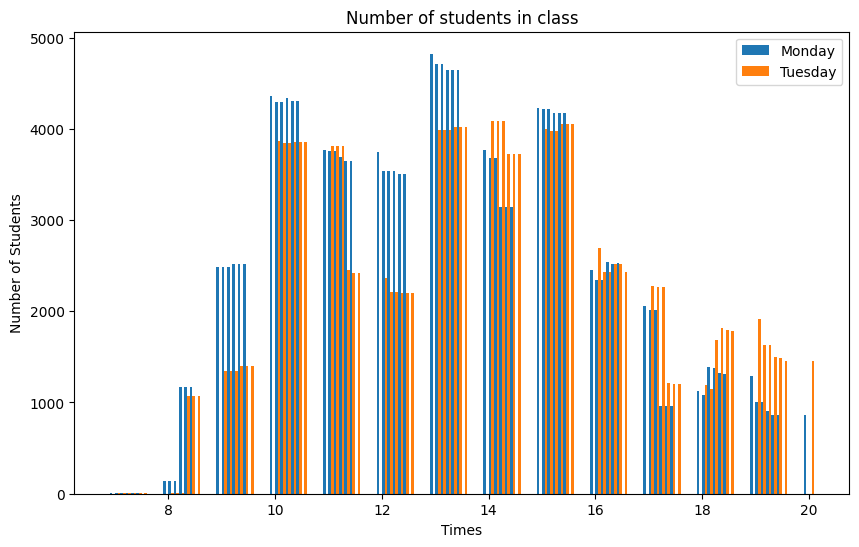

In [198]:
df_times_monday = df_times[df_times['day of week']=="M"]
df_times_tuesday = df_times[df_times['day of week']=="T"]
X = list(df_times_monday['time of day'])
Monday = list(df_times_monday['people in class'])
Tuesday = list(df_times_tuesday['people in class'])
  
X_axis = np.asarray(X)
# print(X_axis)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.075, Monday,width=0.05, label = 'Monday')
plt.bar(X_axis + 0.075, Tuesday, width = 0.05, label = 'Tuesday')
  
# plt.xticks(X)
plt.xlabel("Times")
plt.ylabel("Number of Students")
plt.title("Number of students in class")
plt.legend()
plt.show()

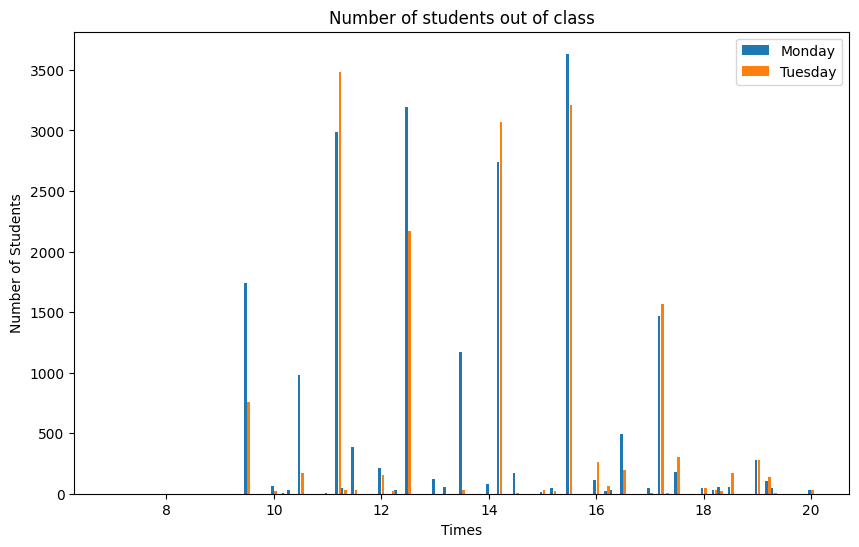

In [199]:
df_times_out_monday = df_out_times[df_out_times['day of week']=="M"]
df_times_out_tuesday = df_out_times[df_out_times['day of week']=="T"]
X = list(df_times_out_monday['time of day'])
Monday = list(df_times_out_monday['people in class'])
Tuesday = list(df_times_out_tuesday['people in class'])
  
X_axis = np.asarray(X)
# print(X_axis)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.03, Monday,width=0.05, label = 'Monday')
plt.bar(X_axis + 0.03, Tuesday, width = 0.05, label = 'Tuesday')
  
# plt.xticks(X)
plt.xlabel("Times")
plt.ylabel("Number of Students")
plt.title("Number of students out of class")
plt.legend()
plt.show()

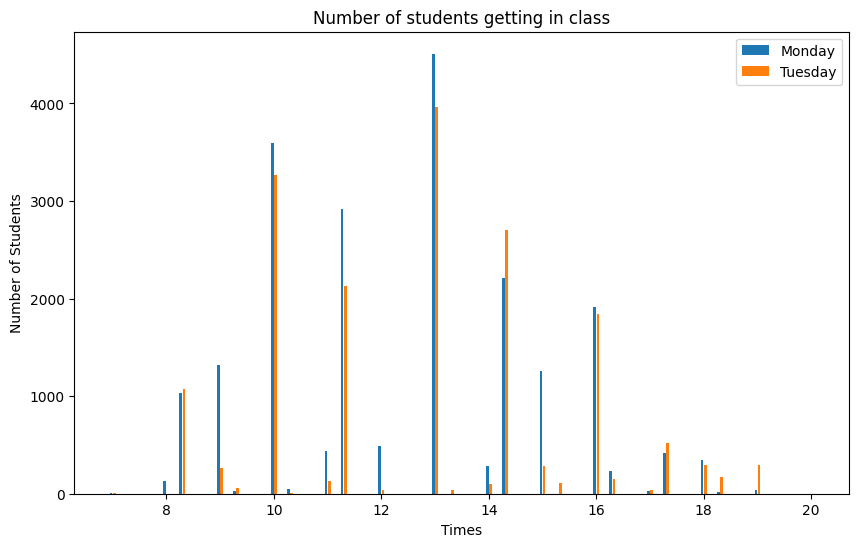

In [200]:
df_times_in_monday = df_in_times[df_in_times['day of week']=="M"]
df_times_in_tuesday = df_in_times[df_in_times['day of week']=="T"]
X = list(df_times_in_monday['time of day'])
Monday = list(df_times_in_monday['people in class'])
Tuesday = list(df_times_in_tuesday['people in class'])
  
X_axis = np.asarray(X)
# print(X_axis)
plt.figure(figsize=(10,6))
plt.bar(X_axis - 0.03, Monday,width=0.05, label = 'Monday')
plt.bar(X_axis + 0.03, Tuesday, width = 0.05, label = 'Tuesday')
  
# plt.xticks(X)
plt.xlabel("Times")
plt.ylabel("Number of Students")
plt.title("Number of students getting in class")
plt.legend()
plt.show()

In [201]:
#need to create table to specify by building as well as day
#fields of the table should be (time of day, number of students(either in class or getting out), building, day of week)
b_set = set()#list of all individual buildings in the df
for index,row, in df_filtered.iterrows():
    for building in row[-1]:
        b_set.add(building)
b_list = list(b_set)
b_list.sort()

In [202]:
poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
df_in_buildings = pd.DataFrame()
dfs_times_new = []
dfs_in_new = []
dfs_out_new = []
counter = 0
#structure of dfs_test should be a 3d array with outer len = 73 (buildings), middle length = 5 (days of week), inner length 
#92 (all time periods possible)

#construct the entire array first
buildings_to_index = {}#dictionary to map the buildings to their index in dfs_test_new
for i in range(len(b_list)):
    buildings_to_index[b_list[i]] = i
    dfs_times_new.append([])
    dfs_in_new.append([])
    dfs_out_new.append([])
    for j in range(5):
        dfs_times_new[-1].append([])
        dfs_in_new[-1].append([])
        dfs_out_new[-1].append([])
        for k in range(len(poss_times)):
            dfs_times_new[-1][-1].append(0)
            dfs_in_new[-1][-1].append(0)
            dfs_out_new[-1][-1].append(0)

for index,row in df_filtered.iterrows():
    b = row[-1][0]
        #go through all the buildings in the list
    index = buildings_to_index[b]
    counter = 0
#         print(dfs_test_new[index][1][counter])
    for i in poss_times:
        for j in range(len(row[10])):
            if i>=row[10][j] and i<=row[11][j]:
                if row[5]==1:
                    dfs_times_new[index][0][counter] = dfs_times_new[index][0][counter] + row[1]
                if row[6]==1:
                    dfs_times_new[index][1][counter] = dfs_times_new[index][1][counter] + row[1]
                if row[7]==1:
                    dfs_times_new[index][2][counter] = dfs_times_new[index][2][counter] + row[1]
                if row[8]==1:
                    dfs_times_new[index][3][counter] = dfs_times_new[index][3][counter] + row[1]
                if row[9]==1:
                    dfs_times_new[index][4][counter] = dfs_times_new[index][4][counter] + row[1]
            if (i==row[11][j]):
                if row[5]==1:
                    dfs_out_new[index][0][counter] = dfs_out_new[index][0][counter] + row[1]
                if row[6]==1:
                    dfs_out_new[index][1][counter] = dfs_out_new[index][1][counter] + row[1]
                if row[7]==1:
                    dfs_out_new[index][2][counter] = dfs_out_new[index][2][counter] + row[1]
                if row[8]==1:
                    dfs_out_new[index][3][counter] = dfs_out_new[index][3][counter] + row[1]
                if row[9]==1:
                    dfs_out_new[index][4][counter] = dfs_out_new[index][4][counter] + row[1]
            if (i==row[10][j]):
                if row[5]==1:
                    dfs_in_new[index][0][counter] = dfs_in_new[index][0][counter] + row[1]
                if row[6]==1:
                    dfs_in_new[index][1][counter] = dfs_in_new[index][1][counter] + row[1]
                if row[7]==1:
                    dfs_in_new[index][2][counter] = dfs_in_new[index][2][counter] + row[1]
                if row[8]==1:
                    dfs_in_new[index][3][counter] = dfs_in_new[index][3][counter] + row[1]
                if row[9]==1:
                    dfs_in_new[index][4][counter] = dfs_in_new[index][4][counter] + row[1]
        counter = counter +1

In [203]:
time = 11.2
total_students = 0
for index,row in df_filtered.iterrows():
    for j in range(len(row[10])):
        if time >= row[10][j] and time <= row[11][j] and row[5]==1:
            total_students = total_students + row[1]
print(total_students)

3755


In [206]:
dfs_times_new

[[[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   96,
   96,
   96,
   96,
   96,
   96,
   96,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   13,
   13,
   13,
   13,
   13,
   13,
   15,
   15,
   15,
   15,
   14,
   14,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   12,
   14,
   14,
   14,
   14,
   14,
   14,
   12,
   12,
   12,
   12,
   12,
   12,
   33,
   33,
   33,
   33,
   33,
   33,
   33,
   33,
   33,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,


In [207]:
df_filtered

,Seats,Enrolled,Waits,Dept_name,school,Monday,Tuesday,Wednesday,Thursday,Friday,start_times,end_times,rooms,buildings
0,15,13,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
1,13,12,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
2,13,11,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
3,13,11,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
4,13,12,0,ARCHITECTURE(A46),Art_Sci,0,1,0,1,0,[14.0],[17.2],[116],[Givens]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,16,13,0,Practice Methods(S50),Art_Sci,0,1,0,0,0,[17.3],[20.3],[200],[Hillman]
3834,14,11,0,Theory Problems & Issues(S20),Art_Sci,1,0,0,0,0,[13.0],[16.0],[200],[Hillman]
3835,20,15,0,Theory Problems & Issues(S20),Art_Sci,0,0,1,0,0,[9.0],[12.0],[370],[Hillman]
3836,24,22,0,Theory Problems & Issues(S20),Art_Sci,0,1,0,0,0,[13.0],[16.0],[39],[Goldfarb]


In [204]:
df_times_buildings = pd.DataFrame()
df_in_buildings = pd.DataFrame()
df_out_buildings = pd.DataFrame()
#structure of the dataframe is time, building, students, day of week
build_counter = 0
for i in b_list:#each building
    counter = 0
    for j in ['M','T','W','H','F']:#each day of week
        build_time_data = {'time of day' : poss_times, 'building' : [i] * len(poss_times), "day of week" : [j] * len(poss_times), "people in class" : dfs_times_new[build_counter][counter]}
        build_in_data = {'time of day' : poss_times, 'building' : [i] * len(poss_times), "day of week" : [j] * len(poss_times), "people in class" : dfs_in_new[build_counter][counter]}
        build_out_data = {'time of day' : poss_times, 'building' : [i] * len(poss_times), "day of week" : [j] * len(poss_times), "people in class" : dfs_out_new[build_counter][counter]}
        
        df_times_temp = pd.DataFrame(data = build_time_data)
        df_in_temp = pd.DataFrame(data = build_in_data)
        df_out_temp = pd.DataFrame(data = build_out_data)
        
        df_times_buildings = pd.concat([df_times_buildings, df_times_temp], ignore_index = True, axis = 0)
        df_in_buildings = pd.concat([df_in_buildings, df_in_temp], ignore_index = True, axis = 0)
        df_out_buildings = pd.concat([df_out_buildings, df_out_temp], ignore_index = True, axis = 0)
        
        counter = counter+1
    build_counter = build_counter +1

In [205]:
df_times_buildings

,time of day,building,day of week,people in class
0,7.0,(None),M,0
1,7.1,(None),M,0
2,7.2,(None),M,0
3,7.3,(None),M,0
4,7.4,(None),M,0
...,...,...,...,...
30015,19.2,Wrighton,F,0
30016,19.3,Wrighton,F,0
30017,19.4,Wrighton,F,0
30018,19.5,Wrighton,F,0


In [ ]:
df_times_buildings.sort_values(by=['people in class'], ascending = False).head(20)

In [ ]:
df_times_out_Seigle_M = df_out_buildings[(df_out_buildings['building']=='Simon') & (df_out_buildings['day of week']=='M')]
df_times_out_Seigle_T = df_out_buildings[(df_out_buildings['building']=='Simon') & (df_out_buildings['day of week']=='T')]

In [ ]:
df_times_Seigle_M = df_times_buildings[(df_times_buildings['building']=='Simon') & (df_times_buildings['day of week']=='M')]
df_times_Seigle_T = df_times_buildings[(df_times_buildings['building']=='Simon') & (df_times_buildings['day of week']=='T')]

In [ ]:
df_times_Seigle_M

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(np.array(poss_times) - 0.03, list(df_times_Seigle_M['people in class']), width= 0.05, label = 'Monday')
plt.bar(np.array(poss_times) + 0.03, list(df_times_Seigle_T['people in class']), width= 0.05, label = 'Tuesday')
plt.xlabel("Times")
plt.ylabel("Number of Students in Hillman")
plt.title("Number of students in Hillman")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(np.array(poss_times) - 0.03, list(df_times_out_Seigle_M['people in class']), width= 0.05, label = 'Monday')
plt.bar(np.array(poss_times) + 0.03, list(df_times_out_Seigle_T['people in class']), width= 0.05, label = 'Tuesday')
plt.xlabel("Times")
plt.ylabel("Number of Students out Seigle")
plt.title("Number of students out Seigle")
plt.legend()
plt.show()

In [ ]:
df_times_out_Seigle = df_out_buildings[df_out_buildings['building']=='Simon']
df_times_out_Seigle.sort_values(by=['people in class'], ascending = False)

## Geographic data collection and storage

In [ ]:
b_list_dist = b_list.copy()
b_list_dist[13] = "Childrens Hosp"

In [ ]:
#make the distance metric value to compare against the getting out of class table in order to gage the best time to get 
#food (also take into account the total number of people in class as a basic heuristic value to compare agaisnt for each
#location)

#main locations to consider: duc, subway, parkside, stanleys, hillman 
#(don't really need to consider bd and village bc not on main campus)
#if it's not in the dictionary then it's too far away to matter
building_coords = {}#dictionary mapping the name of a building to their longitude and latitude for distance metrics
building_coords['Seigle'] = (38.6489757103872, -90.31253449514298)
building_coords['Sever'] = (38.64880664790698, -90.30636882508318)
building_coords['Simon'] = (38.64809429249023, -90.31151076902412)
building_coords['Somers Family'] = (38.64706074307072, -90.3075314786274)
building_coords['Steinberg'] = (38.64662124294788, -90.3028256012481)
building_coords['Stix'] = (38.64630355561184, -90.30992056963892)
building_coords['Sumers Rec Ctr'] = (38.64916959551788, -90.31494068156066)
building_coords['Tietjens Hall'] = (38.6465562265337, -90.31185560680298) #on the 40 so most likely bd?
building_coords['Umrath'] = (38.648039208813664, -90.30978788194473)
building_coords['Urbauer'] = (38.64938765606241, -90.30609664410252)
building_coords['Village House'] = (38.65062405098924, -90.31403151310118)
building_coords['Walker Hall'] = (38.646900730924614, -90.30203438264236)
building_coords['Weil'] = (38.64715970505448, -90.30340670374875)
building_coords['Whitaker'] = (38.64913889368239, -90.30306353125407)
building_coords['Wilson'] = (38.64756768176247, -90.30689080296298)
building_coords['Wom Bldg'] = (38.649375370574425, -90.3084080954738)
building_coords['Wrighton'] = (38.64950433830907, -90.30909643494192)
building_coords['Hillman'] = (38.64680329487367, -90.30468053289408)
building_coords['January Hall'] = (38.647745302479755, -90.30626654605965)
building_coords['Jolley'] = (38.649436402432144, -90.30658541830253)
building_coords['Jubel'] = (38.64853482366569, -90.30340431476512)
building_coords['Kemper'] = (38.647128935903844, -90.30255967301953)
building_coords['Life Sciences'] = (38.64748910829787, -90.30862351265318)
building_coords['Lopata Hall'] = (38.64913374919456, -90.30624457036083)
building_coords['Lopata House'] = (38.651206924331426, -90.31464727847194)
building_coords['Louderman'] = (38.64936280518315, -90.30776452722941)
building_coords['Mallinckrodt'] = (38.64756778721439, -90.3098283709841)
building_coords['McDonnell'] = (38.647198166478354, -90.30667663634529)
building_coords['McMillan'] = (38.64961619005814, -90.3099572694533)
building_coords['McMillen'] = (38.64958718681266, -90.30764730586894)
building_coords['Rebstock'] = (38.647617428614964, -90.30800861426832)
building_coords['Ridgley'] = (38.64814428534339, -90.30615887118805)
building_coords['Rudolph'] = (38.64910733422008, -90.3045729565636)
building_coords['S40 Lien'] = (38.64558682492122, -90.31313605603043) #on the 40 so most likely bd?
building_coords['Schnuck Pav'] = (38.64835153765837, -90.30381660489542)
building_coords['4444 Forst Pk'] = (38.65096295845705, -90.31128863128923)
building_coords['AB Law Bldg'] = (38.64970424789789, -90.3120652552937)
building_coords['Academy Bldg'] = (38.65056163999334, -90.30724468157092)
building_coords['Athletic Complx'] = (38.64971024933669, -90.31460259401626)
building_coords['Bauer'] = (38.649607157655296, -90.31070317578448)
building_coords['Bixby'] = (38.646547794034305, -90.30203998403309)
building_coords['Brauer Hall'] = (38.648942110892435, -90.30226246619063)
building_coords['Brown'] = (38.6471545768611, -90.30565232009128)
building_coords['Busch'] = (38.64751245066617, -90.30581849349812)
building_coords['Busch Lab'] = (38.647743397440074, -90.30861966090147)
building_coords['Crow'] = (38.648993734250745, -90.3055044669093)
building_coords['Cupples I'] = (38.64867351972644, -90.30552727010739)
building_coords['Cupples II'] = (38.64916534876489, -90.30684974096035)
building_coords['Danforth Ctr'] = (38.647705605926426, -90.31044674718503)
building_coords['Duncker'] = (38.648526547987856, -90.30618415924276)
building_coords['Eads'] = (38.648216273947064, -90.30692420657147)
building_coords['Gaylord'] = (38.646354248197255, -90.31121886172929)
building_coords['Givens'] = (38.64665970466113, -90.30354787555484)
building_coords['Goldfarb'] = (38.646976153871, -90.30596735652207)
building_coords['Green Hall'] = (38.648827011272424, -90.30146140112399)

In [ ]:
eating = ['Hillman Food', 'DUC', 'Subway', 'Parkside', 'Whispers','Stanleys', 'Law Cafe', 'Bytes']
building_coords['Hillman Food'] = (38.64680329487360, -90.30468053289403)
building_coords['DUC'] = (38.64776873704934, -90.31029667741174)
building_coords['Subway'] = (38.64773399328886, -90.30916598570988)
building_coords['Parkside'] = (38.64841996141208, -90.30378413029605)
building_coords['Whispers'] = (38.64846593242118, -90.30748155757944)
building_coords['Stanleys'] = (38.649382289575726, -90.30590039275175)
building_coords['Law Cafe'] = (38.649675101147665, -90.3120365530795)
building_coords['Bytes'] = (38.64823465326064, -90.3013329259965)

In [ ]:
df_food_dist = pd.DataFrame()
for food in eating:
    dists = []
    valid_b = []
    for b in b_list:
        if b in building_coords:#otherwise too far away to care
            dists.append((geopy.distance.geodesic(building_coords[food], building_coords[b]).m))
            valid_b.append(b)
    eating_dist_data = {'place to eat' : [food] * len(valid_b), 'building' : valid_b, 'distance' : dists}
    df_temp = pd.DataFrame(data = eating_dist_data)
    df_food_dist = pd.concat([df_food_dist, df_temp], ignore_index=True, axis = 0)

In [ ]:
geopy.distance.geodesic(building_coords['Whitaker'], building_coords['DUC']).m

In [ ]:
df_food_dist.sort_values(by=['distance'])

In [ ]:
#make a table looking at each building figuring out what is closest (small input in terms of the value calculations)
df_food_closest = pd.DataFrame()
valid_b = []
min_food_list = []
for b in b_list:
    if b in building_coords:#otherwise too far to care
        valid_b.append(b)
        min_food_dist = float("inf")
        min_food_index = -1
        counter = 0
        for food in eating:
            if (geopy.distance.geodesic(building_coords[food], building_coords[b]).m) < min_food_dist:
                min_food_dist = geopy.distance.geodesic(building_coords[food], building_coords[b]).m
                min_food_index = counter
            counter = counter +1
        min_food_list.append(eating[min_food_index])
eating__min_dist_data = {'building' : valid_b, 'closest food' : min_food_list}
df_temp = pd.DataFrame(data = eating__min_dist_data)
df_food_closest = pd.concat([df_food_closest, df_temp], ignore_index=True, axis = 0)

In [ ]:
#have to account for when the different eating places are open
eating_hours = {}#dictionary mapping each eating place to the hours its open for (approximately)
eating_hours['Hillman Food'] = (8,14)
eating_hours['DUC'] = (10,15)
eating_hours['Subway'] = (10,18)
eating_hours['Parkside'] = (10,15)
eating_hours['Whispers'] = (8.3,24)
eating_hours['Stanleys'] = (10.3,16)
eating_hours['Law Cafe'] = (7.3,14)
eating_hours['Bytes'] = (9,18)

In [ ]:
df_temp = df_out_buildings[df_out_buildings['building']=='Simon']
df_temp = df_temp[df_temp['day of week']=='M']
df_out_buildings.sort_values(by=['people in class'], ascending = False).head(20)

In [ ]:
df_duc_temp = df_food_dist[df_food_dist['place to eat']=='DUC']
df_duc_temp = df_duc_temp[df_duc_temp['distance']<600]
np.median(np.array(list(df_duc_temp['distance'])))
               

In [ ]:
df_time_out_temp = df_out_buildings[df_out_buildings['time of day']==12.5]
df_time_out_temp.sort_values(by=['people in class'], ascending=False).head()

## Traffic function to predict how busy dining locations would be

In [ ]:
#Value function that will take in as parameters: time, day of the week and tell you a prediction of how busy each of the 
#dining places will be
#traffic function (preliminariy model will just take into account the number of people that get out of the surrounding buildings)
#and be proportional to 1/dist to that building (model as linearly decreasing with respect to distance)
time = 13
d_week = "T"
#df_food_dist data frame for each food place and distance from each building to it
#df_times_out_buildings df for each building and the number of kids that get out at each time interval
#df_times df for the number of kids in class at each time interval (use as rough heuristic?)
poss_times = [round(x,1) for x in list(np.linspace(7,20,131)) if (round(math.modf(x)[0],1) < 0.6)]
def get_traffic(time, d_week):
    
    #preliminary traffic function (still need to take into account varying capacity for each
    #restraunt as well as hours of operation affect traffic flow, and possibly restraunt with min dist getting a boost)
    
    busy_value = []#list of how busy each place will be 
    mod_poss_times = [x for x in list(np.linspace(time-1,time,10, endpoint=False)) if (round(math.modf(x)[0],1) < 0.6)]
    for food in eating:#go through every place available for food
        total_students = 0
        for b in b_list:
            if b in building_coords:
                dist = geopy.distance.geodesic(building_coords[b], building_coords[food]).m
                if dist < 600:#capping at 600
                    df_temp = df_out_buildings[df_out_buildings['building']==b]
                    df_temp = df_temp[df_temp['day of week']==d_week]
                    student_times = list(df_temp['people in class'])
                    index = poss_times.index(round(time-1,1))
                    for i in range((6)):#iterate through the times and find the number of kids getting out at those times modified by the amount of time to current time
    #                     print("time is ", poss_times[index])
                        total_students = total_students + student_times[index] * (.5 + (i * (.5/6)))#adjustment factor
                        index = index +1
                total_students = round(total_students * (1/((dist) * (.01))), 3)
        busy_value.append((food, total_students))
    return busy_value

In [ ]:
df_busy = pd.DataFrame()
food_times = [round(x,1) for x in list(np.linspace(10,17,70)) if (round(math.modf(x)[0],1) < 0.6)]
counter = 0
for i in food_times:
#     i = round(i,1)
    for day in ['M','T','W','H','F']:
        busy_values = get_traffic(i,day)
        eating = []
        busy = []
        for vals in busy_values:
            eating.append(vals[0])
            busy.append(vals[1])
        eating_traffic = {'eating place' : eating, 'busy metric' : busy, 'time of day' : [i] * len(busy_values), 'day of week' : [day] * len(busy_values)}
        df_temp = pd.DataFrame(data = eating_traffic)
        df_busy = pd.concat([df_busy, df_temp], ignore_index = True, axis=  0)

In [ ]:
df_busy['busy metric'] = df_busy['busy metric'].map(lambda x: round(x,3))

In [ ]:
df_busy_duc = df_busy[df_busy['eating place']=='DUC']
# df_busy_duc
df_busy_duc_T = df_busy_duc[df_busy_duc['day of week']=='M']

In [ ]:
plt.bar(food_times, list(df_busy_duc_T['busy metric']), width = 0.05)

In [ ]:
print(df_busy["time of day"][919])
print(df_busy["time of day"][920])

In [ ]:
# b_set = set()#list of all individual buildings in the df
#df_busy. is food
for index,row, in df_times_buildings.iterrows():
    #print(type(row))
    print(str(row[0]) + ", " + str((row[1])+ ", " + str(row[2]) + ", " + str(row[3]))
# b_list = list(b_set)
# b_list.sort()

In [ ]:
df_busy

In [ ]:
# Connect to the database
import pymysql.cursors
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='root123',
                             database='heat_map',
                             cursorclass=pymysql.cursors.DictCursor)

with connection:
    with connection.cursor() as cursor:
        
        insert_stmt = (
          "INSERT INTO food_places (Building, popularity, time_day, day_week) "
          "VALUES (%s, %s, %s, %s)"
        )
        for index,row, in df_busy.iterrows():


            data = (row[0],row[1],row[2],row[3])
            cursor.execute(insert_stmt, data)


    # connection is not autocommit by default. So you must commit to save
    # your changes.
    connection.commit()

#     with connection.cursor() as cursor:
#         # Read a single record
#         sql = "SELECT * FROM people"
#         cursor.execute(sql)
#         result = cursor.fetchone()
#         print(result)

## Inserting into a AWS dataframe via CSV files

In [ ]:
df_times_buildings

In [ ]:
usedBuildings = ["AB Law Bldg", "Athletic Complx", "Bauer", "Bixby", "Brauer Hall", "Brown", "Busch", "Busch Lab", "Crow", "Cupples I", "Cupples II", "Danforth Ctr", "Duncker", "Eads", "Givens", "Green Hall", "Hillman", "January Hall", "Jolley", "Jubel", "Kemper", "Life Sciences", "Lopata Hall", "Mallinckrodt", "McDonnell", "McMillan", "Rebstock", "Ridgley", "Rudolph", "S40 Lien", "Schnuck Pav", "Seigle", "Sever", "Simon", "Somers Family", "Steinberg", "Sumers Rec Ctr", "Umrath", "Urbauer", "Walker Hall", "Weil", "Whitaker", "Wilson", "Wom Bldg", "Wrighton"]
unique = []
for index,row in df_times_buildings.iterrows():
    if( (row["building"]) in usedBuildings and not (row["building"] in unique) ):
        #print(row["building"])
        unique.append(row["building"])



In [ ]:
df_busy

In [ ]:
mydb = mysql.connector.connect(
  host = "localhost",
  user = "root",
  password = "root123",
  database = "heat_map"
) 

mycursor = mydb.cursor()

In [ ]:
# f.write("more testing")
sql = "INSERT INTO food_places (time_day, Building, day_week, popularity) VALUES (%s, %s, %s, %s, %s, %s, %s)"

val = [time, building, day, time, popularity]
mycursor.execute(sql, val)
mydb.commit()
counter = 0
for index,row in df_filtered.iterrows():
    times = []
    for j in range(len(row["start_times"])):
        times = times + (addTimes(row["start_times"][j], row["end_times"][j]))
    #print(times)
    building = str(row["buildings"][0])
    className = "DO CLASS NAME HERE"
    prof = "DO PROF HERE"
    studNum = row["Enrolled"]
    friends = 0


#kjvnkjlsavhbiwlkvhwlkavmhnji
    counter = counter + 1
mydb.close()

In [ ]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("food_busy.txt", "a")

# f.write("more testing")
counter = 0
for index,row in df_busy.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()


In [ ]:
mydb = mysql.connector.connect(
  host = "localhost",
  user = "root",
  password = "root123",
  database = "heat_map"
) 

mycursor = mydb.cursor()

In [ ]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
sql = "INSERT INTO in_class (time_day, Building, day_week, num_students, friends) VALUES (%s, %s, %s, %s, %s)"
# f.write("more testing")
counter = 0
usedBuildings = ["AB Law Bldg", "Athletic Complx", "Bauer", "Bixby", "Brauer Hall", "Brown", "Busch", "Busch Lab", "Crow", "Cupples I", "Cupples II", "Danforth Ctr", "Duncker", "Eads", "Givens", "Green Hall", "Hillman", "January Hall", "Jolley", "Jubel", "Kemper", "Life Sciences", "Lopata Hall", "Mallinckrodt", "McDonnell", "McMillan", "Rebstock", "Ridgley", "Rudolph", "S40 Lien", "Schnuck Pav", "Seigle", "Sever", "Simon", "Somers Family", "Steinberg", "Sumers Rec Ctr", "Umrath", "Urbauer", "Walker Hall", "Weil", "Whitaker", "Wilson", "Wom Bldg", "Wrighton"]

for index,row in df_times_buildings.iterrows():
    if((row["building"]) in usedBuildings):
        time = str(row[0])
        build = str(row[1])
        day = str(row[2])
        num = str(row[3])
        friends = str(0)
        var = [time, build, day, num, friends]
        mycursor.execute(sql, var)
        counter = counter + 1
        
mydb.commit()
mydb.close()

In [ ]:
df_times_buildings

In [ ]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("out_of_class.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_out_buildings.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()

In [ ]:
#inserting the dataframes into the AWS database (write to csv file and then import into database through phpmyadmin)
f = open("going_to_class.txt", "a")
# f.write("more testing")
counter = 0
for index,row in df_in_buildings.iterrows():
    write_info = str(str(row[0])+ ","+ str(row[1])+ ","+ str(row[2])+ ","+ str(row[3]))
    f.write(write_info)
    f.write("\n")
    counter = counter + 1
f.close()